In [2]:
#          #########################################################################
#          #                           IN THE NAME OF ALLAH                        #
#          #             TRUSS BRIDGE SUPERSTRUCTURE MOVABLE DISPLACEMENT          #
#          #-----------------------------------------------------------------------#
#          #              THIS PROGRAM WRITTEN BY SALAR DELAVAR QASHQAI            #
#          #                   EMAIL: salar.d.ghashghaei@gmail.com                 #
#          #########################################################################

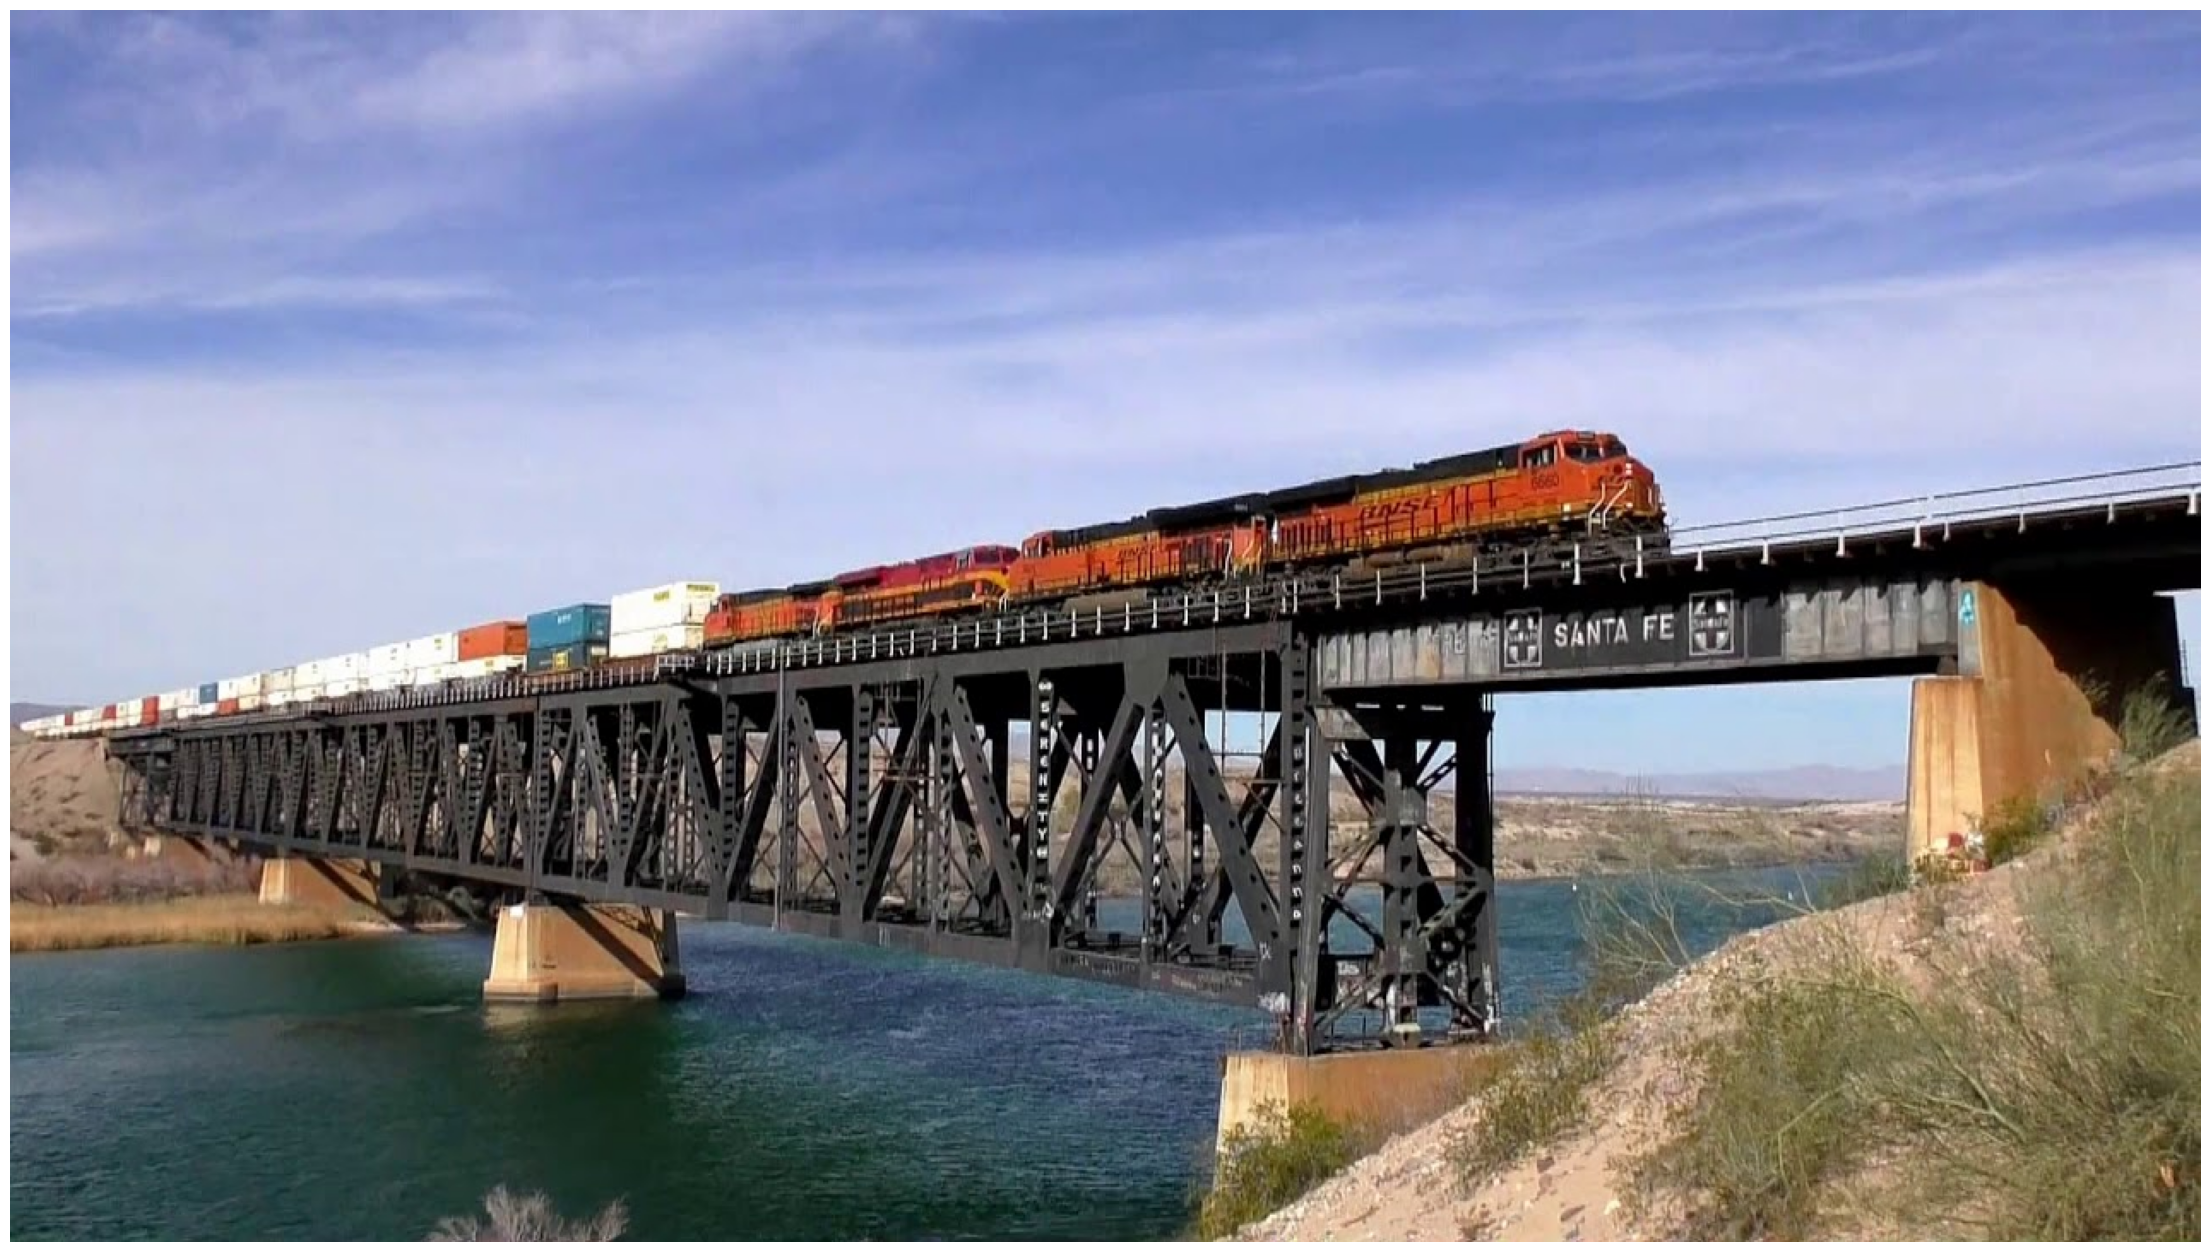

In [3]:
# Load the image
def PLOT_IMAGE(image):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure(figsize=(30, 16))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
image_path = 'OPENSEES_RAILROAD_TRUSS_BRIDGE.png'    
PLOT_IMAGE(image_path)

In [4]:
#import the os module
import os
import math
import time
import numpy as np
import openseespy.opensees as op

In [5]:
#to create a directory at specified path with name "Data"
os.mkdir('C:\\OPENSEESPY_SALAR')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\OPENSEESPY_SALAR'

In [10]:
FOLDER_NAME = 'TRUSS_MOVABLE_DISP'
dir = f"C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\"
if not os.path.exists(dir):
    os.makedirs(dir)

In [11]:
## DELETE ALL FILES IN DIRECTORY 
def DELETE_FOLDER_CONTANTS(folder_path):
    import os
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")
    print("Deletion done")
   
FOLDER_PATH = f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}'  # Specify the folder path
#DELETE_FOLDER_CONTANTS(FOLDER_PATH)   

In [12]:
def HISROGRAM_BOXPLOT(X, HISTO_COLOR, LABEL):
    import numpy as np
    import matplotlib.pyplot as plt
    X = np.array(X)
    print("-------------------------")
    from scipy.stats import skew, kurtosis
    MINIMUM = np.min(X)
    MAXIMUM = np.max(X)
    #MODE = max(set(X), key=list(X).count)
    MEDIAN = np.quantile(X, .50)#q2
    MEAN = np.mean(X)
    STD = np.std(X)
    q1 = np.quantile(X, .25)
    q3 = np.quantile(X, .75)
    SKEW = skew(X)
    KURT = kurtosis(X)
    #SKEW = (MEAN - MODE) / STD
    #KURT = (np.mean((X - MEAN)**4) / STD**4)
    # Estimate confidence intervals of the output variable
    lower_bound = np.quantile(X, .05)
    upper_bound = np.quantile(X, .95)
    print("Box-Chart Datas: ")
    print(f'Minimum: {MINIMUM:.4f}')
    print(f'First quartile: {q1:.4f}')
    #print(f'Mode: {MODE:.4f}')
    print(f'Median: {MEDIAN:.4f}')
    print(f'Mean: {MEAN:.4f}')
    print(f'Std: {STD:.4f}')
    print(f'Third quartile: {q3:.4f}')
    print(f'Maximum: {MAXIMUM :.4f}')
    print(f'Skewness: {skew(X) :.4f}')
    print(f'kurtosis: {kurtosis(X) :.4f}')
    print(f"90% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")
    print("-------------------------")

    plt.figure(figsize=(10,6))
    # Plot histogram of data
    count, bins, ignored = plt.hist(X, bins=100, color=HISTO_COLOR, density=True, align='mid')#, edgecolor="black"
    
    # Plot lognormal PDF
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-(x - MEAN)**2 / (2 * STD**2)) / (STD * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, color='r', label="Normal PDF")
    
    # Plot vertical lines for risk measures
    plt.axvline(q1, color="black", linestyle="--", label=f"Quantile 0.25: {q1:.4f}")
    plt.axvline(MEDIAN, color="green", linestyle="--", label=f"Median: {MEDIAN:.4f}")
    plt.axvline(q3, color="black", linestyle="--", label=f"Quantile 0.75: {q3:.4f}")
    #plt.axvline(MODE, color="purple", linestyle="--", label=f"Mode: {MODE:.4f}")
    plt.axvline(MEAN, color="red", linestyle="--", label=f"Mean: {MEAN:.4f}")
    plt.axvline(MEAN-STD, color="blue", linestyle="--", label=f"Mean-Std: {MEAN-STD:.4f}")
    plt.axvline(MEAN+STD, color="blue", linestyle="--", label=f"Mean+Std: {MEAN+STD:.4f}")
    plt.xlabel(LABEL)
    plt.ylabel("Frequency")
    prob = np.sum(X > 0) / len(X)
    plt.title(f"Histogram - Probability of Positive {LABEL} is {100*prob:.2f} %")
    plt.legend()
    #plt.grid()
    plt.show()

    #Plot boxplot with outliers
    plt.figure(figsize=(10,6))
    plt.boxplot(X, vert=0)
    # Write the quartile data on the chart
    plt.text(q1, 1.05, f" Q1: {q1:.4f}")
    plt.text(MEDIAN, 1.1, f" Q2: {MEDIAN:.4f}")
    plt.text(q3, 1.05, f" Q3: {q3:.4f}")
    #plt.text(MODE, 1.15, f" Mode: {MODE:.4f}")
    
    #plt.text(MEAN, 0.9, f" Mean: {MEAN:.4f}")
    #plt.text(MEAN-STD, 0.9, f" Mean-Std: {MEAN-STD:.4f}")
    #plt.text(MEAN+STD, 0.9, f" Mean+Std: {MEAN+STD:.4f}")
    plt.scatter(MEAN, 1, color="red", marker="+", s=200, label=f"Mean: {MEAN:.4f}")
    plt.scatter(MEAN-STD, 1, color="green", marker="X", s=200, label=f"Mean-Std: {MEAN-STD:.4f}")
    plt.scatter(MEAN+STD, 1, color="blue", marker="*", s=200, label=f"Mean+Std:  {MEAN+STD:.4f}")
    plt.xlabel(LABEL)
    plt.ylabel("Data")
    plt.title(f"Boxplot of {LABEL}")
    plt.legend()
    plt.grid()
    plt.show()
# -----------------------------------------------    
def HISTOGRAM_BOXPLOT_PLOTLY( DATA, XLABEL='X', TITLE='A', COLOR='cyan'):
    # Plotting histogram and boxplot
    import plotly.express as px
    fig = px.histogram(x=DATA, marginal="box", color_discrete_sequence=[COLOR])
    fig.update_layout(title=TITLE, xaxis_title=XLABEL, yaxis_title="Frequency")
    fig.show()     
# -----------------------------------------------
def PLOT_TIME_HIS(x, xlabel, y1, y1label, y2, y2label, y3, y3label, y4, y4label, Z, LOG):
    ## PLOT THE DATA
    import numpy as np
    import matplotlib.pyplot as plt
    # Define colors for each dataset
    colors = ['b', 'g', 'r', 'c']

    # Create subplots based on the value of Z
    fig, axs = plt.subplots(Z, 1, figsize=(14, 14))

    # Plot each dataset with a different color
    for i, y_data in enumerate([y1, y2, y3, y4][:Z]):
        axs[i].plot(x, y_data, color=colors[i])
        axs[i].set_title(f"{[y1label, y2label, y3label, y4label][i]} - MAX ABS: {np.max(np.abs(y_data)):.6e}")
        axs[i].set_xlabel(xlabel)
        #axs[i].set_ylabel()
        axs[i].grid()
        if LOG == 1:
            axs[i].semilogy()

    # Adjust layout
    plt.tight_layout()
    plt.show()  
# -----------------------------------------------    
def MAXABS_FUN(DATA_FILE, COLUMN, I, J):
    import numpy as np
    # Read and process displacement data
    NameFiles = DATA_FILE
    filename = f"{NameFiles}_{I}_{J}.txt"
    D = np.loadtxt(filename)
    #print(D)
    MAXABS = np.max(np.abs([D[:, COLUMN]]))
    #print("MAX. ABS. :", MAXABS)
    return MAXABS
# -----------------------------------------------
def PLOT_2D(X, Y, Xfit, Yfit, XLABEL, YLABEL, TITLE, COLOR, Z):
    import matplotlib.pyplot as plt
    #plt.figure(figsize=(12, 8))
    if Z == 1:
        # Plot 1 line
        plt.plot(X, Y,color=COLOR)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.title(TITLE+f' MIN: {min(Y):.3f} MAX: {max(Y):.3f}')
        plt.grid(True)
        plt.show()
    if Z == 2:
        plt.plot(X, Y, Xfit, Yfit, 'r--', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend(['curve', 'bilinear fitted'], loc='lower right')
        plt.grid(True)
        plt.show()
# -----------------------------------------------
def OUTPUT_SECOND_COLUMN(FOLDER, X, COLUMN, I, Z):
    import numpy as np
    # Time History
    if Z == 1:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]
    if Z == 2:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}_{I}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]    
    return X 
# -----------------------------------------------
def BILNEAR_CURVE(Cur, Mom, SLOPE_NODE):
    import numpy as np
    # bilinear fitting
    SIZE = len(Mom)
    hh = np.zeros(SIZE-1)
    Aa = np.zeros(SIZE-1)
    for i in range(SIZE-1):
        hh[i] = Cur[i+1] - Cur[i]
        Aa[i] = (Mom[i] + Mom[i+1]) * 0.5 * hh[i]

    Area = sum(Aa)
    k0 = Mom[SLOPE_NODE] / Cur[SLOPE_NODE]
    fiy = (Mom[i+1] * max(Cur) * 0.5 - Area) / (Mom[i+1] * 0.5 - k0 * max(Cur) * 0.5)
    My = k0 * fiy
    X = np.array([0, fiy, max(Cur)])
    Y = np.array([0, My, Mom[i+1]])
    """
    print('+==========================+')
    print('=   Analysis curve fitted =')
    print('     Disp       Baser Shear')
    print('----------------------------')
    print(np.column_stack((X.T, Y.T)))
    print('+==========================+')
    """
    # EI and Ductility_Rito of Unconfined Section
    Elastic_ST = Y[1] / X[1]
    Plastic_ST = Y[2] / X[2]
    Tangent_ST = (Y[2] - Y[1]) / (X[2] - X[1])
    Ductility_Rito = X[2] / X[1]
    Over_Strength_Factor = Y[2] / Y[1]
    """
    print('+----------------------------------------------------+')
    print(f' Structure Elastic Stiffness :     {Elastic_ST:.2f}')
    print(f' Structure Plastic Stiffness :     {Plastic_ST:.2f}')
    print(f' Structure Tangent Stiffness :     {Tangent_ST:.2f}')
    print(f' Structure Ductility Ratio :       {Ductility_Rito:.2f}')
    print(f' Structure Over Strength Factor:   {Over_Strength_Factor:.2f}')
    print('+----------------------------------------------------+')
    """
    return X, Y, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor
# -----------------------------------------------
def PLOT3D(X, Y, Z, XLABEL, YLABEL, ZLABEL, TITLE):
    import plotly.graph_objects as go
    # Create a 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(x=X, y=Y, z=Z, mode='markers', marker=dict(size=5, color=Z))])
    fig.update_layout(scene=dict(xaxis_title=XLABEL, yaxis_title=YLABEL, zaxis_title=ZLABEL), title=TITLE)
    fig.show()
# -----------------------------------------------     
# Create a scatter plot
def PLOT_SCATTER(X, Y , XLABEL, YLABEL, TITLE, COLOR, LOG, ORDER):
    import matplotlib.pyplot as plt
    # Calculate linear regression parameters
    import numpy as np
    coefficients = np.polyfit(X, Y, ORDER)
    if ORDER == 1:
        a, b = coefficients
    if ORDER == 2:
        a, b, c = coefficients    
    if ORDER == 3:
        a, b, c, d = coefficients   
    if ORDER == 4:
        a, b, c, d, e = coefficients  
    if ORDER == 5:
        a, b, c, d, e, f = coefficients  
    if ORDER == 6:
        a, b, c, d, e, f, I = coefficients   
    if ORDER == 7:
        a, b, c, d, e, f, I, J = coefficients     
    y = [];yy = [];
    for i in range(len(X)):
        if ORDER == 1:
            y.append(a * X[i] + b)
        if ORDER == 2:
            y.append(a * X[i]**2 + b * X[i] + c)
        if ORDER == 3:
            y.append(a * X[i]**3 + b * X[i]**2 + c * X[i] + d)    
        if ORDER == 4:
            y.append(a * X[i]**4 + b * X[i]**3 + c * X[i]**2 + d * X[i] + e)  
        if ORDER == 5:
            y.append(a * X[i]**5 + b * X[i]**4 + c * X[i]**3 + d * X[i]**2 + e * X[i] + f)    
        if ORDER == 6:
            y.append(a * X[i]**6 + b * X[i]**5 + c * X[i]**4 + d * X[i]**3 + e * X[i]**2 + f * X[i] + I)     
        if ORDER == 7:
            y.append(a * X[i]**7 + b * X[i]**6 + c * X[i]**5 + d * X[i]**4 + e * X[i]**3 + f * X[i]**2 + I * X[i] + J)     
        yy.append(Y[i] - y[-1])
    y = np.array(y)    
    yy = np.array(yy) 
    # Calculate TSS
    Y_mean = np.mean(Y)
    TSS = np.sum((Y - Y_mean) ** 2)
    # Calculate RSS
    RSS = np.sum(yy ** 2)
    # Calculate R-squared
    R_squared = 1 - (RSS / TSS)
    #print(f"R-squared value: {R_squared:.4f}")
    plt.figure(figsize=(10,6))
    plt.scatter(X, Y, color=COLOR, marker='o', label='Data')
    # Add labels and title
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    # Add the linear regression line
    if ORDER == 1:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x + {b:.2f} - R^2 = {R_squared:.3f}')
    if ORDER == 2:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^2 + {b:.2f}x + {c:.2f} - R^2 = {R_squared:.3f}')
    if ORDER == 3:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 4:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^4 + {b:.2f}x^3 + {c:.2f}x^2 + {d:.2f}x + {e:.2f} - R^2 = {R_squared:.3f}') 
    if ORDER == 5:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^5 + {b:.2f}x^4 + {c:.2f}x^3 + {d:.2f}x^2 + {e:.2f}x + {f:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 6:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^6 + {b:.2f}x^5 + {c:.2f}x^4 + {d:.2f}x^3 + {e:.2f}x^2 + {f:.2f}x + {I:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 7:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^7 + {b:.2f}x^6 + {c:.2f}x^5 + {d:.2f}x^4 + {e:.2f}x^3 + {f:.2f}x^2 + {I:.2f}x + {J:.2f} - R^2 = {R_squared:.3f}')               
    
    plt.title(TITLE)
    plt.grid(True)
    plt.legend()
    if LOG == 1:
        plt.semilogx();plt.semilogy();
    plt.show()

def plot_scatter_plotly(X, Y, XLABEL, YLABEL, TITLE, COLOR):
    import plotly.express as px
    fig = px.scatter(x=X, y=Y, color_discrete_sequence=[COLOR], labels={XLABEL: XLABEL, YLABEL: YLABEL})
    fig.update_layout(title=TITLE, xaxis_type='log', yaxis_type='log')
    fig.show() 
# ----------------------------------------------- 
def PLOT_HEATMAP(df):
    import plotly.figure_factory as ff
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create a correlation heatmap
    fig = ff.create_annotated_heatmap(
        z=corr_matrix.values,
        x=list(corr_matrix.columns),
        y=list(corr_matrix.index),
        annotation_text=corr_matrix.round(5).values,
        showscale=True,
        colorscale='Viridis'
    )

    # Update layout
    fig.update_layout(
        title='Correlation Heatmap',
        xaxis=dict(title='Variable'),
        yaxis=dict(title='Variable'),
        width=1200, height=1200
    )

    fig.show()
    
# -----------------------------------------------     
"""
Long short-term memory (LSTM) is a type
of recurrent neural network (RNN) aimed
at dealing with the vanishing gradient
problem present in traditional RNNs
"""
def PREDICT_LSTM(x, y, look_back, ITERATION):
    import numpy as np
    from keras.models import Sequential
    from keras.layers import LSTM, Dense
    # Prepare data for LSTM
    trainX, trainY = [], []
    for i in range(len(x) - look_back):
        trainX.append(x[i:i + look_back])
        trainY.append(y[i + look_back])

    trainX, trainY = np.array(trainX), np.array(trainY)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(4, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs= ITERATION, batch_size=1, verbose=2)

    # Predict the next 'y' value
    next_x = np.array(x[-look_back:]).reshape(1, look_back, 1)
    predicted_y = model.predict(next_x)
    return predicted_y 

# -----------------------------------------------    
def Normal_CDF_Newton_Raphson(P_f, EPS=1e-3, tol=1e-6, max_iter=1000000):
    from scipy.stats import norm
    x = 0.0  # Initial guess (you can choose any value)
    
    for i in range(max_iter):
        xmin = x - EPS
        xmax = x + EPS
        f = norm.cdf(-x) - P_f
        fmin = norm.cdf(-xmin) - P_f
        fmax = norm.cdf(-xmax) - P_f
        df = (fmax - fmin) / (2 * EPS)
        dx = f / df
        f_prime_x = -norm.pdf(-x)
        
        if abs(dx) < tol:
            break
        
        x -= dx
    
    return x
# ----------------------------------------------- 
def MIX_HISTOGRAM(x, y, BINS, X, Y, TITLE):
    plt.figure(figsize=(8, 6))
    plt.hist(x, bins=BINS, alpha=0.5, label=X, color='blue')
    plt.hist(y, bins=BINS, alpha=0.5, label=Y, color='red')
    plt.legend(loc='upper right')
    plt.xlabel("Samples")
    plt.ylabel("Frequency")
    plt.title(TITLE)
    plt.show()
# -----------------------------------------------     
def plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE):
    import matplotlib.pyplot as plt
    """
    Plots multiple lines on the same graph.

    Parameters:
    x (list): List of x values.
    y_list (list of lists): List containing lists of y values for each line.
    labels (list): List of labels for each line.
    """
    for y, label in zip(y_list, LABELS):
        plt.plot(x, y, label=label)
    
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)
    plt.legend()
    plt.grid()
    plt.show()

In [16]:
# pip install openseespy
# pip install --upgrade openseespy

In [7]:
# OUTPUT DATA ADDRESS:
SALAR_DIR = f'C://OPENSEESPY_SALAR//{FOLDER_NAME}//';

NameError: name 'FOLDER_NAME' is not defined

In [10]:
### -----------------------
###    PUSHOVER FUNCTION
### -----------------------

def PUSHOVER_ANALYSIS(nodes, elements, B_01, t_01, B_02, t_02, Weight, ND01, ND02, DMAX, I):
    import openseespy.opensees as op
    # Create a model builder
    op.wipe()
    op.model('basic', '-ndm', 2, '-ndf', 2)
    
    for i in range(0, 62):
        op.node(nodes[i][0], nodes[i][1], nodes[i][2])
    
    # Define boundary conditions
    op.fix(1, 1, 1)
    op.fix(11, 1, 1)
    op.fix(21, 1, 1)
    op.fix(31, 1, 1)
    
    SecTag01 = 1			# BOTTOM AND TOP TRUSS ELEMENTS
    SecTag02 = 2			# DIAGONAL TRUSS ELEMENTS
    # MATERIAL parameters -------------------------------------------------------------------
    IDreinf = 1; 				# material ID tag -- PLATE
    # PLATE MATERIAL PROPERTIES:
    Fy = 380.2			# Steel plate yield stress - ST52
    Fu = 490.3			# Steel plate ultimate stress - ST52
    Es = 200000			# Steel plate modulus of elasticity
    Cy = Fy/Es			# Steel plate yield strain
    Cu = 0.9			# Steel plate ultimate strain
    Esh = (Fu - Fy)/(Cu - Cy) # Steel plate tangent modulus of elasticity
    Bs = Esh / Es				# strain-hardening ratio 
    #Bs = 0.01				# strain-hardening ratio 
    R0 = 18.0				# control the transition from elastic to plastic branches
    cR1 = 0.925				# control the transition from elastic to plastic branches
    cR2 = 0.15				# control the transition from elastic to plastic branches
    # BOTTOM AND TOP TRUSS ELEMENTS
    op.uniaxialMaterial('Steel02', IDreinf, Fy, Es, Bs, R0,cR1,cR2) # build plate material
    # FIBER SECTION properties -------------------------------------------------------------
    # symmetric section
    #                        y
    #                        ^
    #                        |     
    #              _____________________    --  --
    #             |  _________________ |    |   -- tf
    #             | |                | |    |
    #             | |                | |    
    #    z <---   | |                | |    B
    #             | |                | |    
    #             | |________________| |    |
    #             |____________________|    |   -- tf
    #                                      --   --
    #             |-------- B ---------|
    #
    # STEEL BOX SECTION: 
    x01 = B_01 / 2.0
    y01 = B_01 / 2.0
    x02 = (B_01 - t_01) / 2.0
    y02 = (B_01 - t_01) / 2.0
    nfCoreY = 60;			# number of fibers for steel in y-direction
    nfCoreZ = 30;			# number of fibers for steel in z-direction
    op.section('Fiber', SecTag01)
    # Define the core patch
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, -x01, y01, -x01, y01, x01) # TOP PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, -y02, x01, -y02, -x01, -y01, -x01, -y01, -x01) # BOTTOM PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, x02, -y02, x02, -y02, x01) # MIDDLE RIGHT PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, -x01, y02, -x02, -y02, -x02, -y02, -x01) # MIDDLE LEFT PLATE    
    # -----------------------------------------------------------------------------------------------------
    # DIAGONAL TRUSS ELEMENTS
    # FIBER SECTION properties -------------------------------------------------------------
    # symmetric section
    #                        y
    #                        ^
    #                        |     
    #              _____________________    --  --
    #             |  _________________ |    |   -- tf
    #             | |                | |    |
    #             | |                | |    
    #    z <---   | |                | |    B
    #             | |                | |    
    #             | |________________| |    |
    #             |____________________|    |   -- tf
    #                                      --   --
    #             |-------- B ---------|
    #
    # STEEL BOX SECTION: 
    x01 = B_02 / 2.0
    y01 = B_02 / 2.0
    x02 = (B_02 - t_02) / 2.0 
    y02 = (B_02 - t_02) / 2.0
    nfCoreY = 60;			# number of fibers for steel in y-direction
    nfCoreZ = 30;			# number of fibers for steel in z-direction
    op.section('Fiber', SecTag02)
    # Define the core patch
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, -x01, y01, -x01, y01, x01) # TOP PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, -y02, x01, -y02, -x01, -y01, -x01, -y01, -x01) # BOTTOM PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, x01, y02, x02, -y02, x02, -y02, x01) # MIDDLE RIGHT PLATE
    op.patch('quad', IDreinf, nfCoreZ, nfCoreY, y02, -x01, y02, -x02, -y02, -x02, -y02, -x01) # MIDDLE LEFT PLATE
    # -----------------------------------------------------------------------------------------------------
    
    for j in range(121):
        op.element('trussSection', elements[j][0], elements[j][1], elements[j][2], elements[j][3])
        # Recorder for element forces
        op.recorder('Element', '-file', f'{SALAR_DIR}elementForces_{I}_{j}.txt', '-time', '-ele', elements[j][0], 'section', 1, 'force')
        # Recorder for element stress-strain
        op.recorder('Element', '-file', f'{SALAR_DIR}fiber_StressStrain_{I}_{j}.txt', '-time', '-ele', elements[j][0], 'section', 1,'fiber', y01, x01,'stressStrain')# steel fiber    
    
    # Recorder for node displacements
    for j in range(62):
        op.recorder('Node', '-file', f'{SALAR_DIR}nodeDisplacements_{I}_{j}.txt','-time', '-node', nodes[j][0], '-dof', 1,2, 'disp')# Displacement Time History
    


    
    
    #Ouput data
    op.recorder('Node', '-file', f"{SALAR_DIR}DTH_PUSH_{I}.txt",'-time', '-node', ND01, '-dof', 1,2, 'disp')# Displacement Time History Node 2
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_01_{I}.txt",'-time', '-node', 1, '-dof', 1,2, 'reaction')# Base Shear Time History Node 1
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_11_{I}.txt",'-time', '-node', 11, '-dof', 1,2, 'reaction')# Base Shear Time History Node 3
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_21_{I}.txt",'-time', '-node', 21, '-dof', 1,2, 'reaction')# Base Shear Time History Node 3
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_31_{I}.txt",'-time', '-node', 31, '-dof', 1,2, 'reaction')# Base Shear Time History Node 3
    
    #defining gravity loads
    op.timeSeries('Linear', 1)
    op.pattern('Plain', 1, 1)
    for j in range(12, 23): 
        op.load(j, 0.0, -Weight)
    print('Model Built')
    
    Tol = 1e-8 # convergence tolerance for test
    Iter = 1000# convergence iteration for test
    NstepGravity = 10
    DGravity = 1 / NstepGravity
    op.integrator('LoadControl', DGravity) # determine the next time step for an analysis
    op.numberer('Plain') # renumber dof's to minimize band-width (optimization), if you want to
    op.system('BandGeneral') # how to store and solve the system of equations in the analysis
    op.constraints('Plain') # how it handles boundary conditions
    op.test('NormDispIncr', Tol, Iter) # determine if convergence has been achieved at the end of an iteration step
    op.algorithm('Newton') # use Newton's solution algorithm: updates tangent stiffness at every iteration
    op.analysis('Static') # define type of analysis static or transient
    op.analyze(NstepGravity) # apply gravity

    op.loadConst('-time', 0.0) #maintain constant gravity loads and reset time to zero
    
    
    Dincr = 0.001 * DMAX
    Hload = 1#Weight
    maxNumIter = 1000
    tol = 1e-8

    op.timeSeries('Linear', 2)
    op.pattern('Plain', 200, 2)
    op.load(ND01, 0.0, -Hload)

    op.wipeAnalysis()
    op.constraints('Plain')
    op.numberer('Plain')
    op.system('BandGeneral')
    op.test('EnergyIncr', Tol, maxNumIter)
    op.algorithm('Newton')
    
    ## ND01 INCREMENTAL DISPLACEMENT NODE i
    ## ND02 INCREMENTAL DISPLACEMENT NODE j
    IDctrlDOF = 2 ## INCREMENTAL DISPLACEMENT IN Y DIRECTION
    op.integrator('DisplacementControl', ND01, IDctrlDOF, Dincr)
    op.integrator('DisplacementControl', ND02, IDctrlDOF, Dincr)
    op.analysis('Static')


    Nsteps =  int(DMAX/ Dincr)

    ok = op.analyze(Nsteps)
    #print(ok)

    # for gravity analysis, load control is fine, 0.1 is the load factor increment (http://opensees.berkeley.edu/wiki/index.php/Load_Control)

    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:

            if ok != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], Tol, 1000)
                ok = op.analyze(Nsteps)                            
                #print(test[i], algorithm[j], ok)             
                if ok == 0:
                    break
            else:
                continue

    #u2 = op.nodeDisp(2, 1)
    #print("u2 = ", u2)
    print(f'Pushover Done.')
    op.wipe()
    

In [11]:

# Define nodes
L1 = 27000
L2 = 30600
L3 = 27000
H = 4400
l1 = 0.1 * L1
l2 = 0.1 * L2
l3 = 0.1 * L3
#NODE i x y
nodes = [
    (1, 0.0, 0.0), 
    (2, l1, 0.0), 
    (3, 2 * l1, 0.0), 
    (4, 3 * l1, 0.0), 
    (5, 4 * l1, 0.0),
    (6, 5 * l1, 0.0), 
    (7, 6 * l1, 0.0), 
    (8, 7 * l1, 0.0), 
    (9, 8 * l1, 0.0), 
    (10, 9 * l1, 0.0),
    (11, L1, 0.0), 
    (12, L1 + l2, 0.0), 
    (13, L1 + 2 * l2, 0.0), 
    (14, L1 + 3 * l2, 0.0), 
    (15, L1 + 4 * l2, 0.0),
    (16, L1 + 5 * l2, 0.0), 
    (17, L1 + 6 * l2, 0.0), 
    (18, L1 + 7 * l2, 0.0), 
    (19, L1 + 8 * l2, 0.0), 
    (20, L1 + 9 * l2, 0.0),
    (21, L1 + L2, 0.0), 
    (22, L1 + L2 + l3, 0.0),
    (23, L1 + L2 + 2 * l3, 0.0),
    (24, L1 + L2 + 3 * l3, 0.0),
    (25, L1 + L2 + 4 * l3, 0.0),
    (26, L1 + L2 + 5 * l3, 0.0),
    (27, L1 + L2 + 6 * l3, 0.0),
    (28, L1 + L2 + 7 * l3, 0.0),
    (29, L1 + L2 + 8 * l3, 0.0),
    (30, L1 + L2 + 9 * l3, 0.0),
    (31, L1 + L2 + L3, 0.0),
    (32, 0.0, H), 
    (33, l1, H), 
    (34, 2 * l1, H), 
    (35, 3 * l1, H), 
    (36, 4 * l1, H),
    (37, 5 * l1, H), 
    (38, 6 * l1, H), 
    (39, 7 * l1, H), 
    (40, 8 * l1, H), 
    (41, 9 * l1, H),
    (42, L1, H), 
    (43, L1 + l2, H), 
    (44, L1 + 2 * l2, H), 
    (45, L1 + 3 * l2, H), 
    (46, L1 + 4 * l2, H),
    (47, L1 + 5 * l2, H), 
    (48, L1 + 6 * l2, H), 
    (49, L1 + 7 * l2, H), 
    (50, L1 + 8 * l2, H), 
    (51, L1 + 9 * l2, H),
    (52, L1 + L2, H), 
    (53, L1 + L2 + l3, H), 
    (54, L1 + L2 + 2 * l3, H), 
    (55, L1 + L2 + 3 * l3, H), 
    (56, L1 + L2 + 4 * l3, H),
    (57, L1 + L2 + 5 * l3, H), 
    (58, L1 + L2 + 6 * l3, H), 
    (59, L1 + L2 + 7 * l3, H), 
    (60, L1 + L2 + 8 * l3, H), 
    (61, L1 + L2 + 9 * l3, H),
    (62, L1 + L2 + L3, H)]



# Define elements
#ELEMENT i node-i node-j SecrionTag
elements = [
    (1, 1, 2, 1), 
    (2, 2, 3, 1), 
    (3, 3, 4, 1), 
    (4, 4, 5, 1), 
    (5, 5, 6, 1), 
    (6, 6, 7, 1), 
    (7, 7, 8, 1), 
    (8, 8, 9, 1), 
    (9, 9, 10, 1), 
    (10, 10, 11, 1), 
    (11, 11, 12, 1), 
    (12, 12, 13, 1), 
    (13, 13, 14, 1), 
    (14, 14, 15, 1), 
    (15, 15, 16, 1), 
    (16, 16, 17, 1), 
    (17, 17, 18, 1), 
    (18, 18, 19, 1), 
    (19, 19, 20, 1), 
    (20, 20, 21, 1), 
    (21, 21, 22, 1), 
    (22, 22, 23, 1), 
    (23, 23, 24, 1), 
    (24, 24, 25, 1), 
    (25, 25, 26, 1), 
    (26, 26, 27, 1), 
    (27, 27, 28, 1), 
    (28, 28, 29, 1), 
    (29, 29, 30, 1), 
    (30, 30, 31, 1), 
    (31, 32, 33, 1), 
    (32, 32, 34, 1), 
    (33, 34, 35, 1), 
    (34, 35, 36, 1), 
    (35, 36, 37, 1), 
    (36, 37, 38, 1), 
    (37, 38, 39, 1), 
    (38, 39, 40, 1), 
    (39, 40, 41, 1), 
    (40, 41, 42, 1), 
    (41, 42, 43, 1), 
    (42, 43, 44, 1), 
    (43, 44, 45, 1), 
    (44, 45, 46, 1), 
    (45, 46, 47, 1), 
    (46, 47, 48, 1), 
    (47, 48, 49, 1), 
    (48, 49, 50, 1), 
    (49, 50, 51, 1), 
    (50, 51, 52, 1), 
    (51, 52, 53, 1), 
    (52, 53, 54, 1), 
    (53, 54, 55, 1), 
    (54, 55, 56, 1), 
    (55, 56, 57, 1), 
    (56, 57, 58, 1), 
    (57, 58, 59, 1), 
    (58, 59, 60, 1), 
    (59, 60, 61, 1), 
    (60, 61, 62, 1), 
    (61, 1, 32, 2), 
    (62, 1, 33, 2), 
    (63, 2, 33, 2), 
    (64, 3, 33, 2), 
    (65, 3, 34, 2), 
    (66, 3, 35, 2), 
    (67, 4, 35, 2), 
    (68, 5, 35, 2), 
    (69, 5, 36, 2), 
    (70, 5, 37, 2), 
    (71, 6, 37, 2), 
    (72, 7, 37, 2), 
    (73, 7, 38, 2), 
    (74, 7, 39, 2), 
    (75, 8, 39, 2), 
    (76, 9, 39, 2), 
    (77, 9, 40, 2), 
    (78, 9, 41, 2), 
    (79, 10, 41, 2), 
    (80, 11, 41, 2), 
    (81, 11, 42, 2), 
    (82, 11, 43, 2), 
    (83, 12, 43, 2), 
    (84, 13, 43, 2), 
    (85, 13, 44, 2), 
    (86, 13, 45, 2), 
    (87, 14, 45, 2), 
    (88, 15, 45, 2), 
    (89, 15, 46, 2), 
    (90, 15, 47, 2),
    (91, 16, 47, 2),
    (92, 17, 47, 2),
    (93, 17, 48, 2),
    (94, 17, 49, 2),
    (95, 18, 49, 2),
    (96, 19, 49, 2),
    (97, 19, 50, 2),
    (98, 19, 51, 2),
    (99, 20, 51, 2),
    (100, 21, 51, 2),
    (101, 21, 52, 2),
    (102, 21, 53, 2),
    (103, 22, 53, 2),
    (104, 23, 53, 2),
    (105, 23, 54, 2),
    (106, 23, 55, 2),
    (107, 24, 55, 2),
    (108, 25, 55, 2),
    (109, 25, 56, 2),
    (110, 25, 57, 2),
    (111, 26, 57, 2),
    (112, 27, 57, 2),
    (113, 27, 58, 2),
    (114, 27, 59, 2),
    (115, 28, 59, 2),
    (116, 29, 59, 2),
    (117, 29, 60, 2),
    (118, 29, 61, 2),
    (119, 30, 61, 2),
    (120, 31, 61, 2),
    (121, 31, 62, 2)]


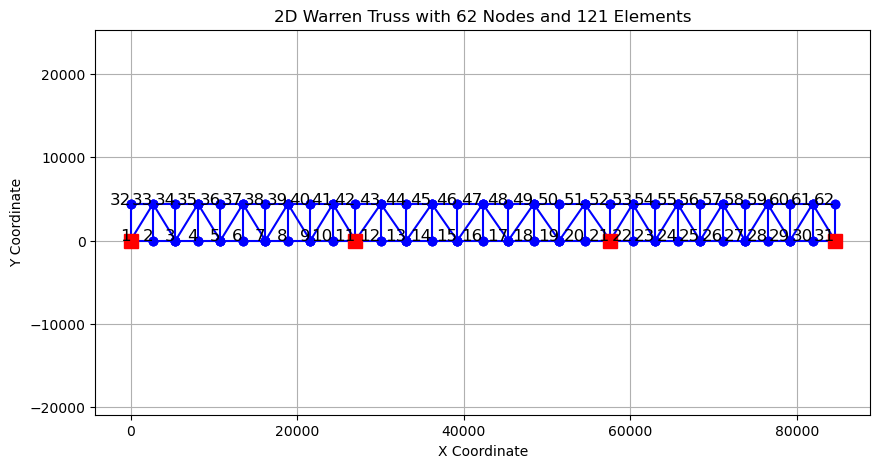

In [12]:
# Plot the truss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
for element in elements:
    node_start = nodes[element[1] - 1]
    node_end = nodes[element[2] - 1]
    plt.plot([node_start[1], node_end[1]], [node_start[2], node_end[2]], 'bo-')

# Annotate nodes
for node in nodes:
    plt.text(node[1], node[2], str(node[0]), fontsize=12, ha='right')
    
# Plot simply supports
simply_supported_nodes = [1,11, 21, 31]
for node_id in simply_supported_nodes:
    node = nodes[node_id - 1]
    plt.plot(node[1], node[2], 'rs', markersize=10)  # 'rs' for red square    

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Warren Truss with 62 Nodes and 121 Elements')
plt.grid(True)
plt.axis('equal')
plt.show()

In [13]:
### -----------------------------------------
###   Bridge Substructure Response Spectrum
### -----------------------------------------

# TRUSS SECTION PROPERTIES:
B_01 = 400 # [mm] SECTION 01 WIDTH
t_01 = 20 # [mm] SECTION 01 THICKNESS
B_02 = 200 # [mm] SECTION 02 WIDTH
t_02 = 10 # [mm] SECTION 02 THICKNESS
# -------------------------

DMAX = +70 # [mm] Max. Pushover Incremental Displacement


DATA_FILE05 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\T.txt' #STRUCTURE PERIOD

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

NUM_ITERATION = 31
with open(DATA_FILE05, "w") as file:
    for i in range(2, NUM_ITERATION):
        if i == 11 or i == 21:
            q = 1
        else:    
            ND01 = i
            ND02 = 33 + i - 2           
            print('NODE01: ', ND01, 'NODE02: ', ND02)
            #print(f'{i+1} MASS: {PCol:.5f} WEIGHT: {PColw:.5f}')
            PUSHOVER_ANALYSIS(nodes, elements, B_01, t_01, B_02, t_02, 0.0, ND01, ND02, DMAX, i)
            #file.write(f"{i+1} {a:.4f} {Massef:.4f}\n")
            #print(f'Real Period: {a:.4f} - Period: {T:.4f}')
    
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

Current time (HH:MM:SS): 10:58:35


NODE01:  2 NODE02:  33
Model Built
Pushover Done.
NODE01:  3 NODE02:  34
Model Built
Pushover Done.
NODE01:  4 NODE02:  35
Model Built
Pushover Done.
NODE01:  5 NODE02:  36
Model Built
Pushover Done.
NODE01:  6 NODE02:  37
Model Built
Pushover Done.
NODE01:  7 NODE02:  38
Model Built
Pushover Done.
NODE01:  8 NODE02:  39
Model Built
Pushover Done.
NODE01:  9 NODE02:  40
Model Built
Pushover Done.
NODE01:  10 NODE02:  41
Model Built
Pushover Done.
NODE01:  12 NODE02:  43
Model Built
Pushover Done.
NODE01:  13 NODE02:  44
Model Built
Pushover Done.
NODE01:  14 NODE02:  45
Model Built
Pushover Done.
NODE01:  15 NODE02:  46
Model Built
Pushover Done.
NODE01:  16 NODE02:  47
Model Built
Pushover Done.
NODE01:  17 NODE02:  48
Model Built
Pushover Done.
NODE01:  18 NODE02:  49
Model Built
Pushover Done.
NODE01:  19 NODE02:  50
Model Built
Pushover Done.
NODE01:  20 NODE02:  51
Model Built
Pushover Done.
NODE01:  22 NODE02:  53
Model Built
Pushover Done.
NOD

In [13]:
## FILE ADDRESS
DATA_FILE01 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\nodeDisplacements'  # NODE DISPLACEMENT - PUSH
DATA_FILE02 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\elementForces'  # ELEMENT FORCE - PUSH
DATA_FILE03 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\fiber_StressStrain'  # SECTION STRAIN-STRESS - PUSH

In [32]:
### LOAD OUTPUT DATAS
Disp37 = [] # Vertical Displacement Node 37
Disp47 = [] # Vertical Displacement Node 47
Disp57 = [] # Vertical Displacement Node 57

eleForce06 = [] # Element Axial Load 06
eleStrain06 = [] # Element Axial Strain 06
eleStress06 = [] # Element Axial Stress 06

eleForce16 = [] # Element Axial Load 16
eleStrain16 = [] # Element Axial Strain 16
eleStress16 = [] # Element Axial Stress 16

eleForce26 = [] # Element Axial Load 26
eleStrain26 = [] # Element Axial Strain 26
eleStress26 = [] # Element Axial Stress 26

eleForce70 = [] # Element Axial Load 70
eleStrain70 = [] # Element Axial Strain 70
eleStress70 = [] # Element Axial Stress 70

eleForce90 = [] # Element Axial Load 90
eleStrain90 = [] # Element Axial Strain 90
eleStress90 = [] # Element Axial Stress 90

eleForce110 = [] # Element Axial Load 110
eleStrain110 = [] # Element Axial Strain 110
eleStress110 = [] # Element Axial Stress 110

osf = [] # Over Strength Factor of Structure
dr = []  # Ductility Ratio of Structure
eei = [] # Elastic Flexural rigidity of Structure
pei = [] # Plastic Flexural rigidity of Structure
yd = [] # Yield Displacement of Structure
yb = [] # Yield Base-sheaer of Structure
ud = [] # Utilamte Displacement of Structure
ub = [] # Utilamte Base-sheaer of Structure
bs01 = [] # Base-sheaer Node 01
bs02 = [] # Base-sheaer Node 11
bs03 = [] # Base-sheaer Node 21
bs04 = [] # Base-sheaer Node 31
NodeJOINT = [] # Joint Counts

ys_strain = 0.02 # Yield strain - STEEL REBAR
us_strain = 0.1  # Ultimate strain - STEEL REBAR

yc_strain = 0.0002 # Yield strain - CONFINED CONCRETE
uc_strain = 0.008  # Ultimate strain -  CONFINED CONCRETE

Tmax = 0.01 # Maximum Period 
NUM_ITERATION = 31
Tdmax = Tmax / NUM_ITERATION

for i in range(2, NUM_ITERATION):
    if i == 11 or i == 21:
        q = 1
    else:    
        ND01 = i
        ND02 = 33 + i - 2           
        print('NODE01: ', ND01, 'NODE02: ', ND02)
        Disp37.append(MAXABS_FUN(DATA_FILE01, 2, i, 36))# DISPLACEMENT OF NODE 37 - Y DIRECTION
        Disp47.append(MAXABS_FUN(DATA_FILE01, 2, i, 46))# DISPLACEMENT OF NODE 47 - Y DIRECTION
        Disp57.append(MAXABS_FUN(DATA_FILE01, 2, i, 56))# DISPLACEMENT OF NODE 57 - Y DIRECTION
        
        
        eleForce06.append(MAXABS_FUN(DATA_FILE02, 1, i, 5))# ELEMENT 6 FORCE
        eleStrain06.append(MAXABS_FUN(DATA_FILE03, 2, i, 5))# ELEMENT 6 STRAIN
        eleStress06.append(MAXABS_FUN(DATA_FILE03, 1, i, 5))# ELEMENT 6 STRESS
        
        eleForce16.append(MAXABS_FUN(DATA_FILE02, 1, i, 15))# ELEMENT 16 FORCE
        eleStrain16.append(MAXABS_FUN(DATA_FILE03, 2, i, 15))# ELEMENT 16 STRAIN
        eleStress16.append(MAXABS_FUN(DATA_FILE03, 1, i, 15))# ELEMENT 16 STRESS
        
        eleForce26.append(MAXABS_FUN(DATA_FILE02, 1, i, 25))# ELEMENT 26 FORCE
        eleStrain26.append(MAXABS_FUN(DATA_FILE03, 2, i, 25))# ELEMENT 26 STRAIN
        eleStress26.append(MAXABS_FUN(DATA_FILE03, 1, i, 25))# ELEMENT 26 STRESS
        
        eleForce70.append(MAXABS_FUN(DATA_FILE02, 1, i, 69))# ELEMENT 70 FORCE
        eleStrain70.append(MAXABS_FUN(DATA_FILE03, 2, i, 69))# ELEMENT 70 STRAIN
        eleStress70.append(MAXABS_FUN(DATA_FILE03, 1, i, 69))# ELEMENT 70 STRESS
        
        eleForce90.append(MAXABS_FUN(DATA_FILE02, 1, i, 89))# ELEMENT 90 FORCE
        eleStrain90.append(MAXABS_FUN(DATA_FILE03, 2, i, 89))# ELEMENT 90 STRAIN
        eleStress90.append(MAXABS_FUN(DATA_FILE03, 1, i, 89))# ELEMENT 90 STRESS
        
        eleForce110.append(MAXABS_FUN(DATA_FILE02, 1, i, 109))# ELEMENT 110 FORCE
        eleStrain110.append(MAXABS_FUN(DATA_FILE03, 2, i, 109))# ELEMENT 110 STRAIN
        eleStress110.append(MAXABS_FUN(DATA_FILE03, 1, i, 109))# ELEMENT 110 STRESS

        # STRUCTURE DUCTILITY DAMAGE INDEX
        dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, i, 2) # Reading Disp from Text file - PUSHOVER
        base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 1
        base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_11', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 11
        base03 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_21', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 21
        base04 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_31', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 33
        dispP = abs(dispP)
        baseP = abs(base01 + base02 + base03 + base04)
        xx, yy, Elastic_EI, Plastic_EI, Tangent_EI, Ductility_Rito, Over_Stregth_Factor = BILNEAR_CURVE(dispP, baseP, 30)
        bs01.append(max(abs(base01)))
        bs02.append(max(abs(base02)))
        bs03.append(max(abs(base03)))
        bs04.append(max(abs(base04)))
        osf.append(Over_Stregth_Factor)
        dr.append(Ductility_Rito)
        pei.append(Plastic_EI)
        eei.append(Elastic_EI)
        yd.append(xx[1])
        yb.append(yy[1])
        ud.append(xx[2])
        ub.append(yy[2])
        NodeJOINT.append(ND01)


NODE01:  2 NODE02:  33
NODE01:  3 NODE02:  34
NODE01:  4 NODE02:  35
NODE01:  5 NODE02:  36
NODE01:  6 NODE02:  37
NODE01:  7 NODE02:  38
NODE01:  8 NODE02:  39
NODE01:  9 NODE02:  40
NODE01:  10 NODE02:  41
NODE01:  12 NODE02:  43
NODE01:  13 NODE02:  44
NODE01:  14 NODE02:  45
NODE01:  15 NODE02:  46
NODE01:  16 NODE02:  47
NODE01:  17 NODE02:  48
NODE01:  18 NODE02:  49
NODE01:  19 NODE02:  50
NODE01:  20 NODE02:  51
NODE01:  22 NODE02:  53
NODE01:  23 NODE02:  54
NODE01:  24 NODE02:  55
NODE01:  25 NODE02:  56
NODE01:  26 NODE02:  57
NODE01:  27 NODE02:  58
NODE01:  28 NODE02:  59
NODE01:  29 NODE02:  60
NODE01:  30 NODE02:  61


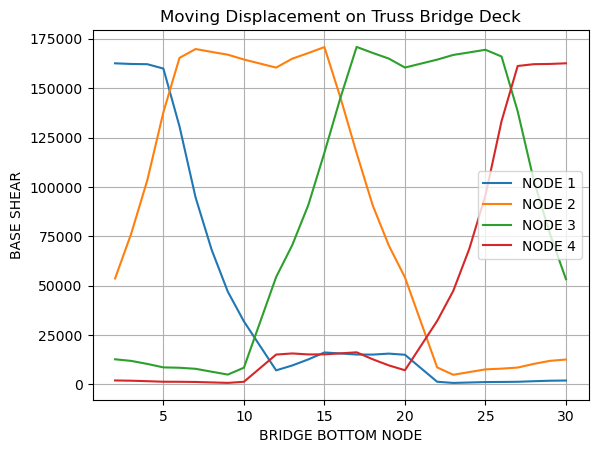

In [33]:
# Data usage
x = NodeJOINT
y_list = [
    bs01,
    bs02,
    bs03,
    bs04
]

XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'BASE SHEAR'
TITLE = 'Moving Displacement on Truss Bridge Deck'
LABELS = ['NODE 1', 'NODE 2', 'NODE 3','NODE 4']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)


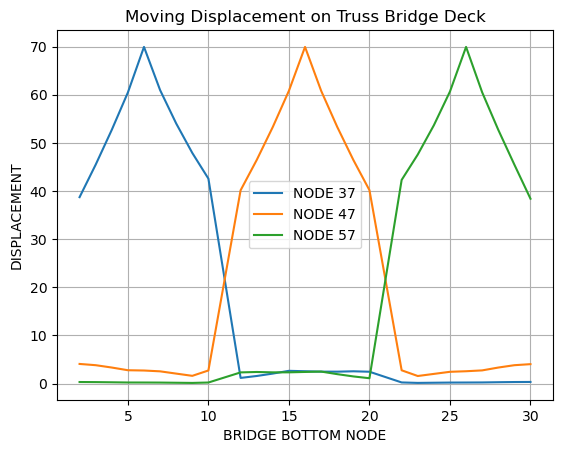

In [34]:
# Data usage
x = NodeJOINT
y_list = [
    Disp37,
    Disp47,
    Disp57
]

XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'DISPLACEMENT'
TITLE = 'Moving Displacement on Truss Bridge Deck'
LABELS = ['NODE 37', 'NODE 47', 'NODE 57']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

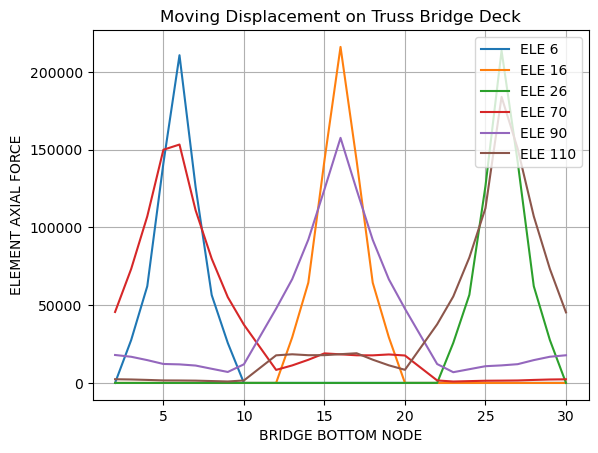

In [35]:
# Data usage
x = NodeJOINT
y_list = [
    eleForce06,
    eleForce16,
    eleForce26,
    eleForce70,
    eleForce90,
    eleForce110
]

XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'ELEMENT AXIAL FORCE'
TITLE = 'Moving Displacement on Truss Bridge Deck'
LABELS = ['ELE 6', 'ELE 16', 'ELE 26', 'ELE 70', 'ELE 90', 'ELE 110']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

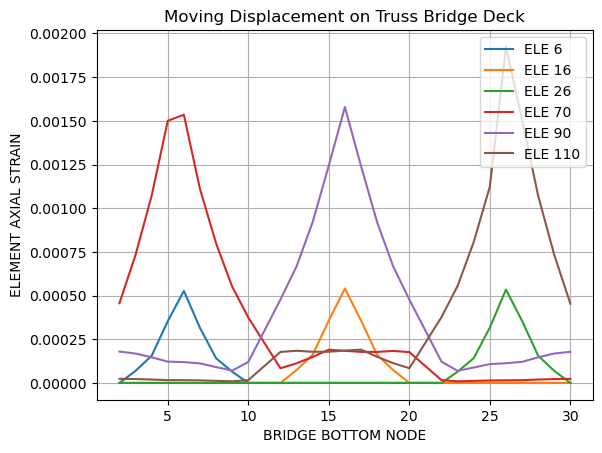

In [36]:
# Data usage
x = NodeJOINT
y_list = [
    eleStrain06,
    eleStrain16,
    eleStrain26,
    eleStrain70,
    eleStrain90,
    eleStrain110
]

XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'ELEMENT AXIAL STRAIN'
TITLE = 'Moving Displacement on Truss Bridge Deck'
LABELS = ['ELE 6', 'ELE 16', 'ELE 26', 'ELE 70', 'ELE 90', 'ELE 110']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

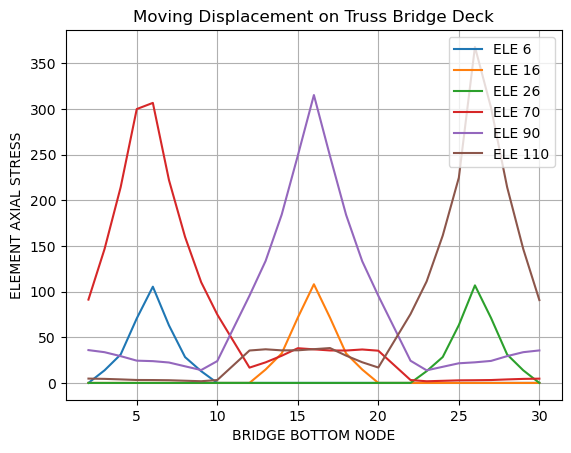

In [37]:
# Data usage
x = NodeJOINT
y_list = [
    eleStress06,
    eleStress16,
    eleStress26,
    eleStress70,
    eleStress90,
    eleStress110
]

XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'ELEMENT AXIAL STRESS'
TITLE = 'Moving Displacement on Truss Bridge Deck'
LABELS = ['ELE 6', 'ELE 16', 'ELE 26', 'ELE 70', 'ELE 90', 'ELE 110']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

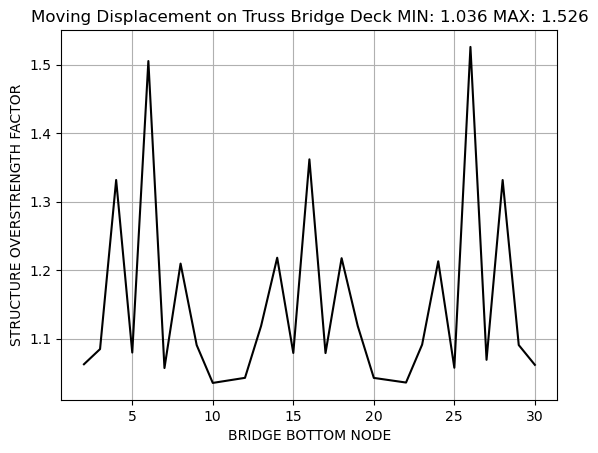

In [38]:
XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'STRUCTURE OVERSTRENGTH FACTOR'
TITLE = 'Moving Displacement on Truss Bridge Deck'
COLOR = 'black'
PLOT_2D(NodeJOINT, osf,_,_, XLABEL, YLABEL, TITLE, COLOR='black', Z=1) 

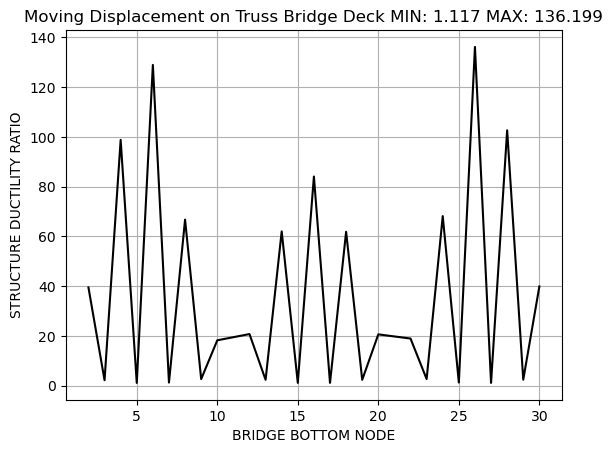

In [32]:
XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'STRUCTURE DUCTILITY RATIO'
TITLE = 'Moving Displacement on Truss Bridge Deck'
COLOR = 'black'
PLOT_2D(NodeJOINT, dr,_,_, XLABEL, YLABEL, TITLE, COLOR='black', Z=1) 

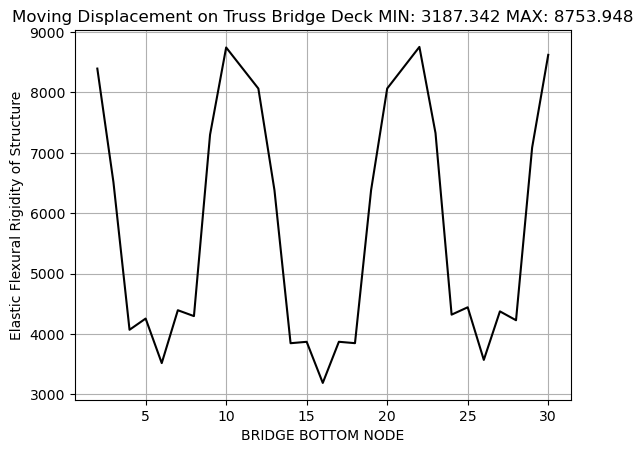

In [33]:
XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'Elastic Flexural Rigidity of Structure'
TITLE = 'Moving Displacement on Truss Bridge Deck'
COLOR = 'black'
PLOT_2D(NodeJOINT, eei,_,_, XLABEL, YLABEL, TITLE, COLOR='black', Z=1) 

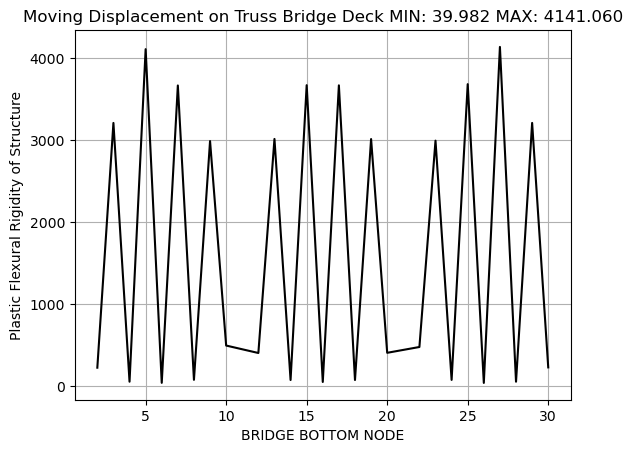

In [34]:
XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'Plastic Flexural Rigidity of Structure'
TITLE = 'Moving Displacement on Truss Bridge Deck'
COLOR = 'black'
PLOT_2D(NodeJOINT, pei,_,_, XLABEL, YLABEL, TITLE, COLOR='black', Z=1) 

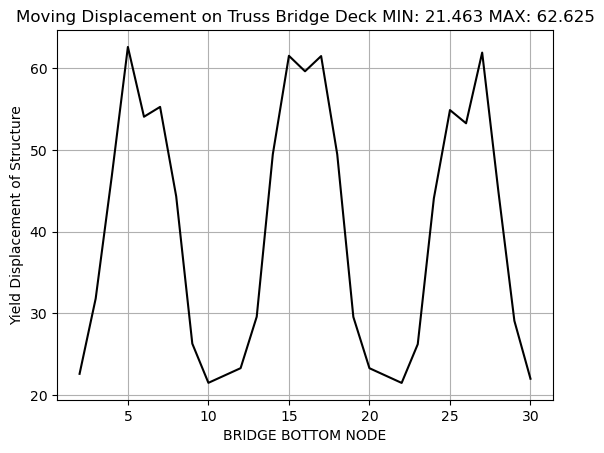

In [35]:
XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'Yield Displacement of Structure'
TITLE = 'Moving Displacement on Truss Bridge Deck'
COLOR = 'black'
PLOT_2D(NodeJOINT, yd,_,_, XLABEL, YLABEL, TITLE, COLOR='black', Z=1) 

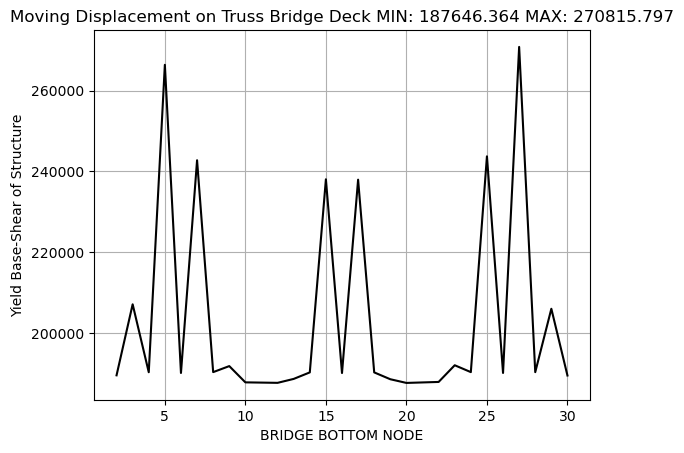

In [36]:
XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'Yield Base-Shear of Structure'
TITLE = 'Moving Displacement on Truss Bridge Deck'
COLOR = 'black'
PLOT_2D(NodeJOINT, yb,_,_, XLABEL, YLABEL, TITLE, COLOR='black', Z=1) 

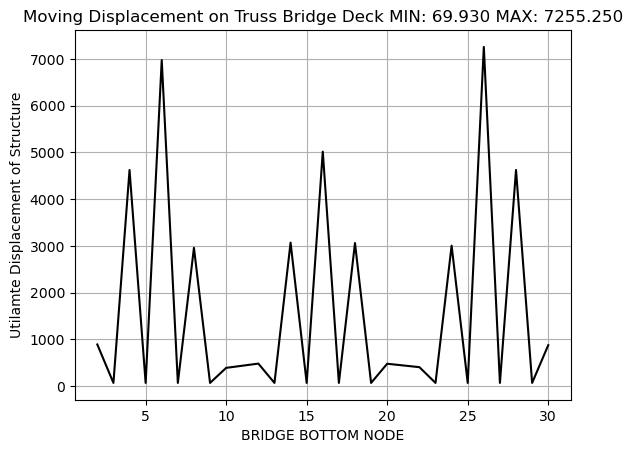

In [37]:
XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'Utilamte Displacement of Structure'
TITLE = 'Moving Displacement on Truss Bridge Deck'
COLOR = 'black'
PLOT_2D(NodeJOINT, ud,_,_, XLABEL, YLABEL, TITLE, COLOR='black', Z=1) 

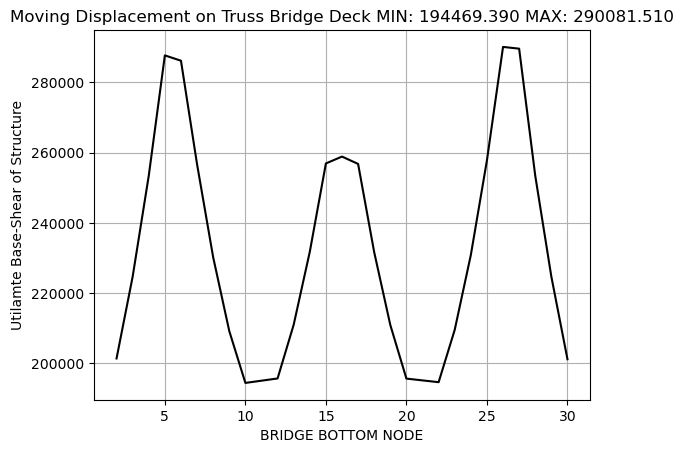

In [38]:
XLABEL = 'BRIDGE BOTTOM NODE'
YLABEL = 'Utilamte Base-Shear of Structure'
TITLE = 'Moving Displacement on Truss Bridge Deck'
COLOR = 'black'
PLOT_2D(NodeJOINT, ub,_,_, XLABEL, YLABEL, TITLE, COLOR='black', Z=1) 

In [ ]:
HISROGRAM_BOXPLOT(eleStrain06, HISTO_COLOR='purple', LABEL='Velocity Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(eleStress06, HISTO_COLOR='green', LABEL='Acceleration Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(eleDisp, HISTO_COLOR='orange', LABEL='Base-shear Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(osf, HISTO_COLOR='lime', LABEL='Structure Ductility Damage Index Response Spectrum')

In [ ]:
HISROGRAM_BOXPLOT(dr, HISTO_COLOR='pink', LABEL='Section Ductility Damage Index Response Spectrum')

In [42]:
### LAST LOAD DATA
import numpy as np
## PYSHOVER ANALYSIS DATA
# Displacement Time History
DTHP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, i, 2)
# Base Shear Time History 01
BTH01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, i, 2)
# Base Shear Time History 11
BTH011 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_11', 2, i, 2)
# Base Shear Time History 21
BTH021 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_21', 2, i, 2)
# Base Shear Time History 31
BTH031 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_31', 2, i, 2)
BTHP = abs(BTH01 + BTH011 + BTH021 + BTH031)

print(len(DTHP), len(BTHP))


1009 1009


8622.66494374651


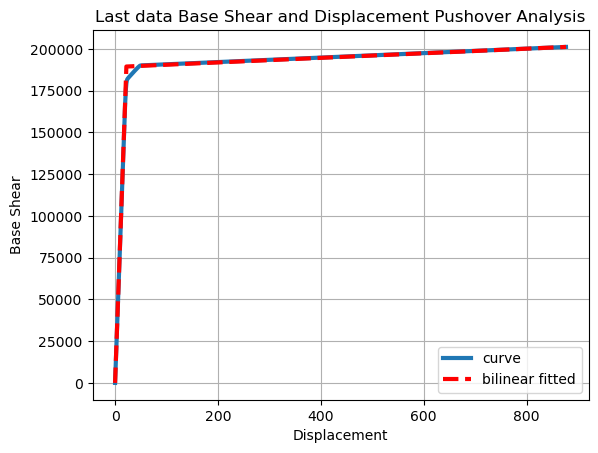

In [85]:
xx, yy, _, _, _, _, _ = BILNEAR_CURVE(abs(DTHP), abs(BTHP), 10)
print(yy[1]/ xx[1])
#demand_disp = MAXABS_FUN(DATA_FILE01, 1, i)# DEMAND DYNAMIC DISPLACEMENT
XLABEL = 'Displacement'
YLABEL = 'Base Shear'
TITLE = 'Last data Base Shear and Displacement Pushover Analysis'
COLOR = 'black'
PLOT_2D(abs(DTHP), abs(BTHP), xx, yy, XLABEL, YLABEL, TITLE, COLOR='black', Z=2) 